# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fifa22 = pd.read_csv("../data/players_22.csv")
df_goles = pd.read_csv("../data/datos_reales_15_10_2024_id.csv")

In [3]:
df_goles.head(30)
# df_inglesa = df_fifa22[df_fifa22["league_name"]=="Spain Primera Division", "English League One"]
# df_fifa22 = df_fifa22[df_fifa22["league_name"].isin(["Spain Primera Division", "English League One"])]

,Unnamed: 0,nombre,match_id,posicion,pj,pt,goles,asistencias,tarjetas,equipo,porteria
0,811,K. Mbappé,231747,delantero,35,34,28,17,10,psg,0
1,13,K. Benzema,165153,delantero,32,31,27,12,0,real_madrid,0
2,609,C. Immobile,192387,delantero,31,31,27,2,4,lazio,0
3,834,W. Ben Yedder,199451,delantero,37,29,25,5,3,monaco,0
4,293,M. Salah,209331,delantero,35,30,23,13,1,liverpool,0
5,327,Heung-Min Son,200104,delantero,35,35,23,7,2,tottenham_hotspur,0
6,902,M. Dembélé,231443,delantero,30,25,21,4,6,olympique_lyonnais,0
7,568,Lautaro Martínez,231478,delantero,35,28,21,3,6,inter,0
8,851,Martin Terrier,236786,delantero,37,37,21,3,1,stade_rennais,0
9,352,C. Ronaldo,20801,delantero,30,27,18,3,8,manchester_united,0


In [4]:
df_goles.drop(columns=["Unnamed: 0"], inplace=True)
df_goles22 = df_goles[df_goles["goles"] > 0]
df_goles22.reset_index(drop=True, inplace=True)

In [5]:
df_fifa22 = df_fifa22.rename(columns={"sofifa_id":"match_id"})

In [6]:
columns_to_drop = ["player_url","club_jersey_number","club_loaned_from","club_contract_valid_until","nation_position","nation_jersey_number","player_face_url","club_logo_url","club_flag_url","nation_logo_url","nation_flag_url"]
ns_cols = ["ls""st""rs""lw""lf""cf""rf""rw""lam""cam""ram""lm""lcm""cm""rcm""rm","lwb"]
desired_columns = ["match_id","short_name","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","league_name"]

In [7]:
df = df_fifa22[desired_columns]
df.head()

,match_id,short_name,shooting,pace,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,league_name
0,216199,P. Mainka,39.0,50.0,39,30,75,33,45,36,...,50,75,84,37,74,35,44,40,72,German 2. Bundesliga
1,214096,T. Kleindienst,75.0,66.0,50,77,75,69,65,54,...,70,81,86,72,61,77,55,59,67,German 2. Bundesliga
2,202873,K. Müller,NaN,NaN,12,13,13,11,17,13,...,67,31,76,15,41,11,10,20,52,German 2. Bundesliga
3,222521,O. Hüsing,32.0,47.0,38,24,76,31,45,29,...,63,58,90,25,74,28,45,43,67,German 2. Bundesliga
4,224980,M. Busch,49.0,84.0,73,40,54,34,69,49,...,56,80,74,49,78,53,45,36,55,German 2. Bundesliga


In [8]:
df = df[df["shooting"].notna()]

In [9]:
df = pd.merge(df,df_goles,on="match_id",how="left")

In [10]:
df.head()

,match_id,short_name,shooting,pace,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,...,league_name,nombre,posicion,pj,pt,goles,asistencias,tarjetas,equipo,porteria
0,216199,P. Mainka,39.0,50.0,39,30,75,33,45,36,...,German 2. Bundesliga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214096,T. Kleindienst,75.0,66.0,50,77,75,69,65,54,...,German 2. Bundesliga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222521,O. Hüsing,32.0,47.0,38,24,76,31,45,29,...,German 2. Bundesliga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,224980,M. Busch,49.0,84.0,73,40,54,34,69,49,...,German 2. Bundesliga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183573,N. Theuerkauf,56.0,60.0,66,46,64,44,59,57,...,German 2. Bundesliga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df["goles"] = df["goles"].fillna(0)
df["goles"] = df["goles"].astype(int)

In [12]:
df["pj"] = df["pj"].fillna(0)
df["pj"] = df["pj"].astype(int)

In [13]:
df.head()

,match_id,short_name,shooting,pace,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,...,league_name,nombre,posicion,pj,pt,goles,asistencias,tarjetas,equipo,porteria
0,216199,P. Mainka,39.0,50.0,39,30,75,33,45,36,...,German 2. Bundesliga,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN
1,214096,T. Kleindienst,75.0,66.0,50,77,75,69,65,54,...,German 2. Bundesliga,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN
2,222521,O. Hüsing,32.0,47.0,38,24,76,31,45,29,...,German 2. Bundesliga,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN
3,224980,M. Busch,49.0,84.0,73,40,54,34,69,49,...,German 2. Bundesliga,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN
4,183573,N. Theuerkauf,56.0,60.0,66,46,64,44,59,57,...,German 2. Bundesliga,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN


In [14]:
desired_columns = ["match_id","short_name","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy",
                   "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration",
                   "movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots",
                   "mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","posicion","pj","goles"]
desired_columns = ["match_id","short_name","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy",
                   "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration",
                   "movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots",
                   "mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","posicion","goles"]

In [15]:
# df_inglesa = df[df["league_name"]=="English League One"]
# df = df[df["league_name"]=="Spain Primera Division"]
df = df[desired_columns]

In [16]:
goles = df[df["goles"]!=0]

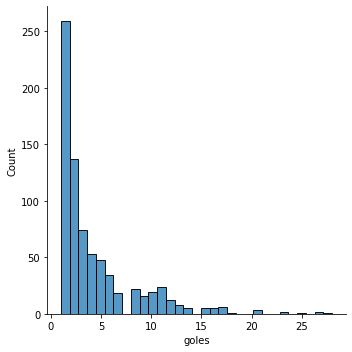

In [17]:
sns.displot(goles['goles']);

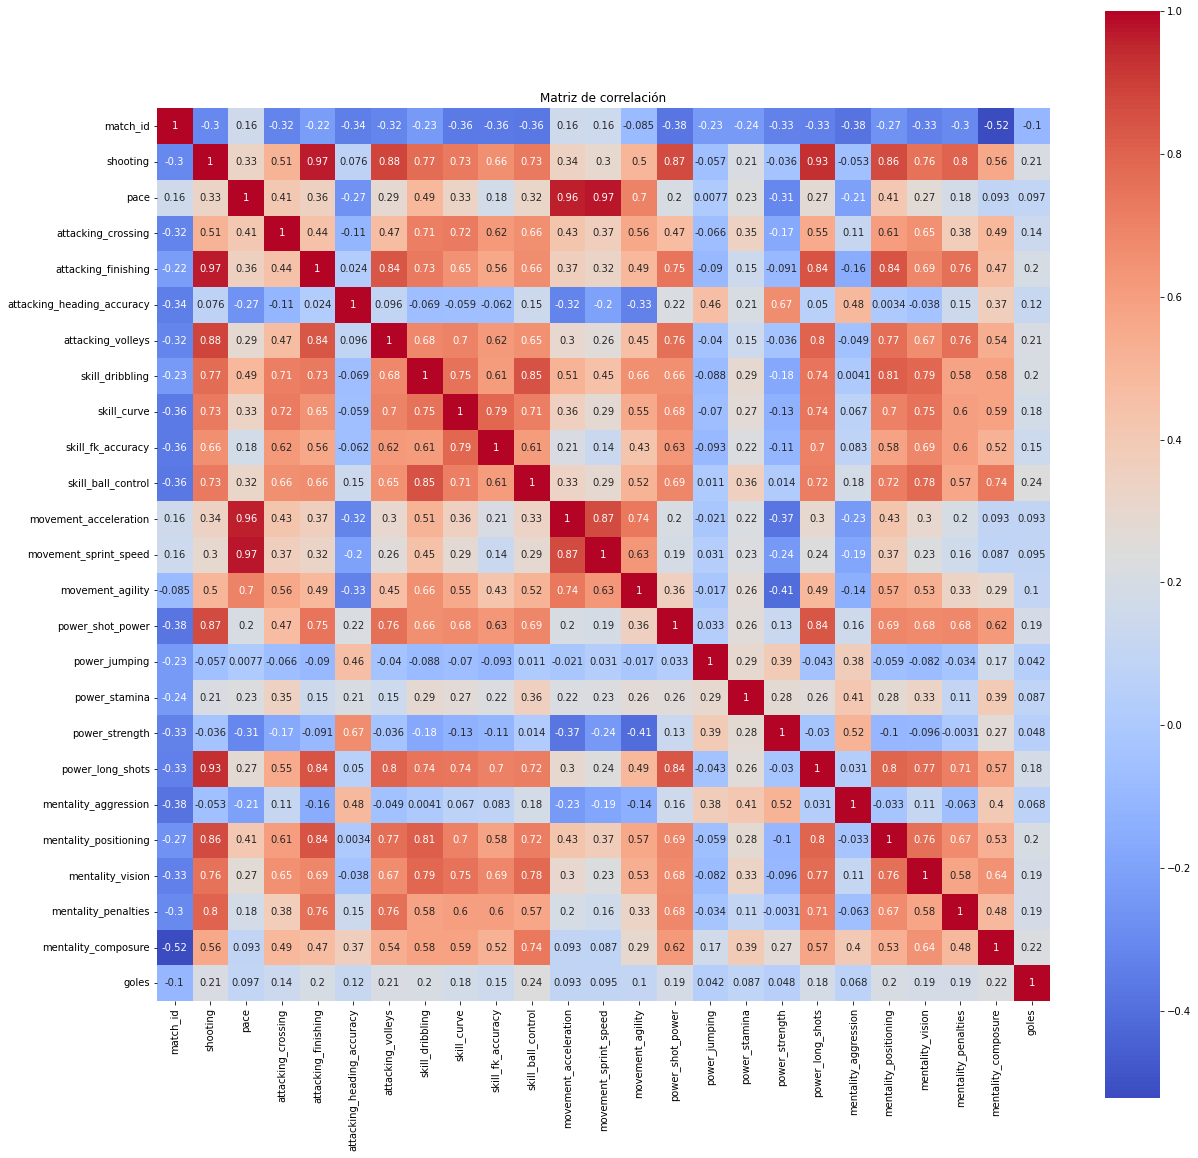

In [18]:
# Seleccionar solo las columnas numéricas y calcular la correlación
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()

In [19]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = df.select_dtypes(include="number").drop("goles",axis=1)
Y = df['goles']

# Paso 1: Escalar las características con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Realizar predicciones con el conjunto de prueba
Y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Mostrar resultados
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")


(13718, 24)
(13718,)
(3430, 24)
(3430,)
Mean Squared Error: 1.2076876637009455
Mean absolute Error: 0.4326854737522472
R-squared: 0.07495363352195283


In [20]:
# df_inglesa = df_fifa22[df_fifa22["league_name"]=="English League One"]

In [21]:
# df_fifa22["league_name"].value_counts()
d = df_inglesa.select_dtypes(["number"])
d

NameError: name 'df_inglesa' is not defined